<a href="https://colab.research.google.com/github/TeodoroMas/ESM/blob/main/Copia_di_Copia_di_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tifffile imagecodecs

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from tensorflow import keras
from unet import UNet


In [ ]:
model = UNet(input_shape= (None,None,3),num_output=1)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, None, None,   36928       ['conv2d[0][0]']                 
                                64)                                                           

In [ ]:
!pip install tifffile imagecodecs
!wget https://www.dropbox.com/sh/z4hbbzqai0ilqht/AADp_8oefNFs2bjC2kzl2_Fqa/training.zip
!unzip -q training.zip

--2022-05-13 06:54:54--  https://www.dropbox.com/sh/z4hbbzqai0ilqht/AADp_8oefNFs2bjC2kzl2_Fqa/training.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/z4hbbzqai0ilqht/AADp_8oefNFs2bjC2kzl2_Fqa/training.zip [following]
--2022-05-13 06:54:55--  https://www.dropbox.com/sh/raw/z4hbbzqai0ilqht/AADp_8oefNFs2bjC2kzl2_Fqa/training.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8ceed3bec156e9330101750b0a.dl.dropboxusercontent.com/cd/0/inline/BlKYiQQux92gZoQ3cjepoKMrIGOSSNDyzjBGGLePQv2olyGAcfB-352K9Q3hJQ4RY1J6yumsZ0zHYGUXSo0dx0-DxwDEMgqs6YYjXhrQ05_Y2tB2F7wLBMr1lqwiJGI-tzTVJY6-w1e7K4RSsk1WoCbinDOIyS_7Mz5HoV3homQZhg/file# [following]
--2022-05-13 06:54:55--  https://uc8ceed3bec156e9330101750b0a.dl.dropboxusercontent.c

In [ ]:
def carica_immagine(index):
  filename_img = '/content/training/images/%d_training.tif' % index
  filename_fov = '/content/training/mask/%d_training_mask.gif' % index
  filename_seg = '/content/training/1st_manual/%d_manual1.gif' % index

  img = np.float32(io.imread(filename_img)) / 255
  fov = np.float32(io.imread(filename_fov)) / 255
  seg = np.float32(io.imread(filename_seg)) / 255

  return img, fov, seg



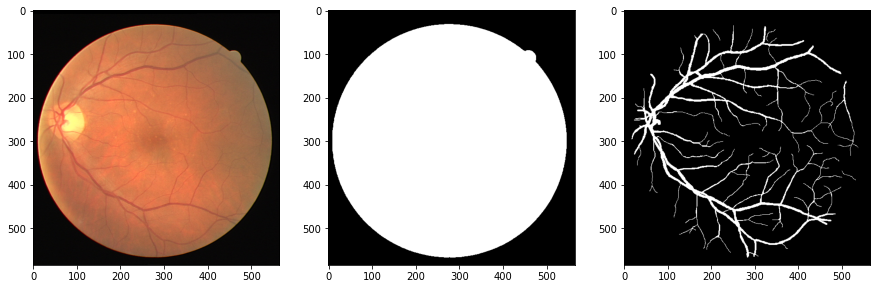

In [ ]:
img, fov, seg = carica_immagine(21)
plt.figure(figsize=(15,9))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(fov, cmap='gray',clim= [0,1])
plt.subplot(1,3,3)
plt.imshow(seg,cmap='gray',clim= [0,1])

plt.show()


In [ ]:
def estrai_blocco(index):
  img, fov, seg = carica_immagine(index)
  list_block_img = list()
  list_block_seg = list()
  for i in range(0, img.shape[0]-48,16):
    for j in range(0,img.shape[1]-48,16):
      block_img = img[i:i+48,j:j+48,:]
      block_seg = seg[i:i+48,j:j+48]
      block_fov = fov[i:i+48,j:j+48]
      if np.sum(block_fov)>0.5:
        list_block_img.append(block_img)
        list_block_seg.append(block_seg)

  list_block_img = np.stack(list_block_img,0)
  list_block_seg = np.stack(list_block_seg,0)
  return list_block_img, list_block_seg

In [ ]:
x_train = list()
y_train = list()

for index in range(37,41):
  img_blocks, seg_blocks = estrai_blocco(index)
  x_train.append(img_blocks)
  y_train.append(seg_blocks)






x_train = np.concatenate(x_train,0)
y_train = np.concatenate(y_train,0)

%whos

Variable          Type          Data/Info
-----------------------------------------
UNet              function      <function UNet at 0x7f480ce76440>
carica_immagine   function      <function carica_immagine at 0x7f4805c49680>
estrai_blocco     function      <function estrai_blocco at 0x7f4805a12950>
fov               ndarray       584x565: 329960 elems, type `float32`, 1319840 bytes (1.258697509765625 Mb)
img               ndarray       584x565x3: 989880 elems, type `float32`, 3959520 bytes (3.776092529296875 Mb)
img_blocks        ndarray       1017x48x48x3: 7029504 elems, type `float32`, 28118016 bytes (26.8154296875 Mb)
index             int           40
io                module        <module 'skimage.io' from<...>/skimage/io/__init__.py'>
keras             module        <module 'keras.api._v2.ke<...>i/_v2/keras/__init__.py'>
model             Functional    <keras.engine.functional.<...>object at 0x7f480947b2d0>
np                module        <module 'numpy' from '/us<...>kages/nu

In [ ]:
y_train = np.expand_dims(y_train,-1)
y_valid = np.expand_dims(y_valid, -1)

NameError: ignored

In [ ]:
from unet import iou_metric
model.compile(loss=keras.losses.binary_crossentropy,
              optimazer = keras.optimizers.SGD(learning_rate=0.01),
              metrics=[])

#tensor floew e come numpy pero con operzioni in piu per l back propagation


In [ ]:
model.fit(x_train, y_train, batch_size= 64, epochs= 4, validation_data= (x_valid,y_valid),verbose=1)


#model.save_weights('pesi.h5')
#model.load_weights('pesi.h5')


!wget -q -c http://www.grip.unina.it/download/guide_TF/weights_unet_retina.hdf5
model.load_weights('unet_weights_retina.hdf5')

loss,iou = model.evaluate(x_valid, y_valid)

In [ ]:
print(iou)

In [ ]:
model.predict()